In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')# Load saved data
data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e1-communication-simulation-theta.npz", allow_pickle=True)
all_theta = data["all_theta"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e1-communication-simulation-gamma.npz", allow_pickle=True)
all_gamma = data["all_gamma"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e1-communication-simulation-z.npz", allow_pickle=True)
all_z = data["all_z"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e1-communication-simulation-noise.npz", allow_pickle=True)
all_noise = data["all_noise"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e1-communication-simulation-received-signal.npz", allow_pickle=True)
all_received_signal = data["all_received_signal"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e1-communication-simulation-general.npz", allow_pickle=True)
snr_db_array = data["snr_db_array"]
pilot_length_array = data["pilot_length_array"]
M = data["M"]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Results CA-SBL Alpha = 1.0 Beta = 2.0

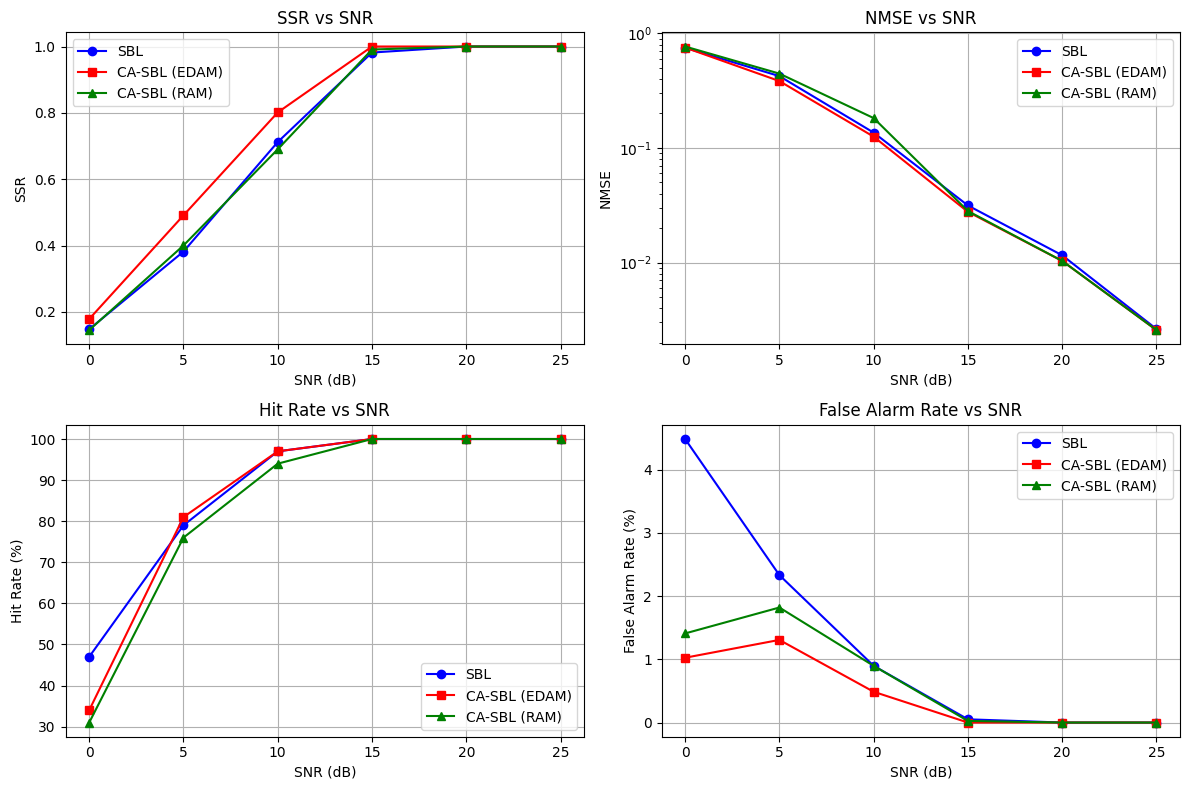

In [4]:
data = np.load('/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-sbl-snr-db-all-pilot-length-20.npz', allow_pickle=True)

gamma_sbl = data['gamma_sbl']
hit_rate_sbl = data['hit_rate_sbl']
support_recovery_rate_sbl = data['support_recovery_rate_sbl']
false_alarm_rate_sbl = data['false_alarm_rate_sbl']
norm_mse_sbl = data['norm_mse_sbl']
avg_hit_rate_sbl = data['avg_hit_rate_sbl']
avg_support_recovery_rate_sbl = data['avg_support_recovery_rate_sbl']
avg_false_alarm_rate_sbl = data['avg_false_alarm_rate_sbl']
avg_norm_mse_sbl = data['avg_norm_mse_sbl']
pilot_length = data['pilot_length']

data = np.load('/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-alpha-1-0-beta-2-0-ram-snr-db-all-pilot-length-20.npz', allow_pickle=True)

gamma_casbl_uncorrelated = data['gamma_casbl']
hit_rate_casbl_uncorrelated = data['hit_rate_casbl']
support_recovery_rate_casbl_uncorrelated = data['support_recovery_rate_casbl']
false_alarm_rate_casbl_uncorrelated = data['false_alarm_rate_casbl']
norm_mse_casbl_uncorrelated = data['norm_mse_casbl']
avg_hit_rate_casbl_uncorrelated = data['avg_hit_rate_casbl']
avg_support_recovery_rate_casbl_uncorrelated = data['avg_support_recovery_rate_casbl']
avg_false_alarm_rate_casbl_uncorrelated = data['avg_false_alarm_rate_casbl']
avg_norm_mse_casbl_uncorrelated = data['avg_norm_mse_casbl']

data = np.load('/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-alpha-1-0-beta-2-0-edam-snr-db-all-pilot-length-20.npz', allow_pickle=True)

gamma_casbl_correlated = data['gamma_casbl']
hit_rate_casbl_correlated = data['hit_rate_casbl']
support_recovery_rate_casbl_correlated = data['support_recovery_rate_casbl']
false_alarm_rate_casbl_correlated = data['false_alarm_rate_casbl']
norm_mse_casbl_correlated = data['norm_mse_casbl']
avg_hit_rate_casbl_correlated = data['avg_hit_rate_casbl']
avg_support_recovery_rate_casbl_correlated = data['avg_support_recovery_rate_casbl']
avg_false_alarm_rate_casbl_correlated = data['avg_false_alarm_rate_casbl']
avg_norm_mse_casbl_correlated = data['avg_norm_mse_casbl']

pilot_length_index = np.where(pilot_length_array == pilot_length)[0][0]

# Define the SNR values for x-axis
snr_values = snr_db_array

# Create subplots for different performance metrics
plt.figure(figsize=(12, 8))

# Define a common legend format
legend_labels = ['SBL', 'CA-SBL (EDAM)', 'CA-SBL (RAM)']
legend_markers = ['o', 's', '^']
legend_colors = ['b', 'r', 'g']

# Plot Support Recovery Rate (SSR)
plt.subplot(2, 2, 1)
plt.plot(snr_values, avg_support_recovery_rate_sbl, marker=legend_markers[0], linestyle='-', color=legend_colors[0])
plt.plot(snr_values, avg_support_recovery_rate_casbl_correlated, marker=legend_markers[1], linestyle='-', color=legend_colors[1])
plt.plot(snr_values, avg_support_recovery_rate_casbl_uncorrelated, marker=legend_markers[2], linestyle='-', color=legend_colors[2])
plt.xlabel("SNR (dB)")
plt.ylabel("SSR")
plt.title("SSR vs SNR")
plt.grid(True)
plt.legend(legend_labels)

# Plot NMSE (Normalized MSE)
plt.subplot(2, 2, 2)
plt.plot(snr_values, avg_norm_mse_sbl, marker=legend_markers[0], linestyle='-', color=legend_colors[0])
plt.plot(snr_values, avg_norm_mse_casbl_correlated, marker=legend_markers[1], linestyle='-', color=legend_colors[1])
plt.plot(snr_values, avg_norm_mse_casbl_uncorrelated, marker=legend_markers[2], linestyle='-', color=legend_colors[2])
plt.xlabel("SNR (dB)")
plt.ylabel("NMSE")
plt.title("NMSE vs SNR")
plt.yscale('log')  # Log scale for better visualization
plt.grid(True)
plt.legend(legend_labels)

# Plot Hit Rate
plt.subplot(2, 2, 3)
plt.plot(snr_values, avg_hit_rate_sbl, marker=legend_markers[0], linestyle='-', color=legend_colors[0])
plt.plot(snr_values, avg_hit_rate_casbl_correlated, marker=legend_markers[1], linestyle='-', color=legend_colors[1])
plt.plot(snr_values, avg_hit_rate_casbl_uncorrelated, marker=legend_markers[2], linestyle='-', color=legend_colors[2])
plt.xlabel("SNR (dB)")
plt.ylabel("Hit Rate (%)")
plt.title("Hit Rate vs SNR")
plt.grid(True)
plt.legend(legend_labels)

# Plot False Alarm Rate
plt.subplot(2, 2, 4)
plt.plot(snr_values, avg_false_alarm_rate_sbl, marker=legend_markers[0], linestyle='-', color=legend_colors[0])
plt.plot(snr_values, avg_false_alarm_rate_casbl_correlated, marker=legend_markers[1], linestyle='-', color=legend_colors[1])
plt.plot(snr_values, avg_false_alarm_rate_casbl_uncorrelated, marker=legend_markers[2], linestyle='-', color=legend_colors[2])
plt.xlabel("SNR (dB)")
plt.ylabel("False Alarm Rate (%)")
plt.title("False Alarm Rate vs SNR")
plt.grid(True)
plt.legend(legend_labels)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


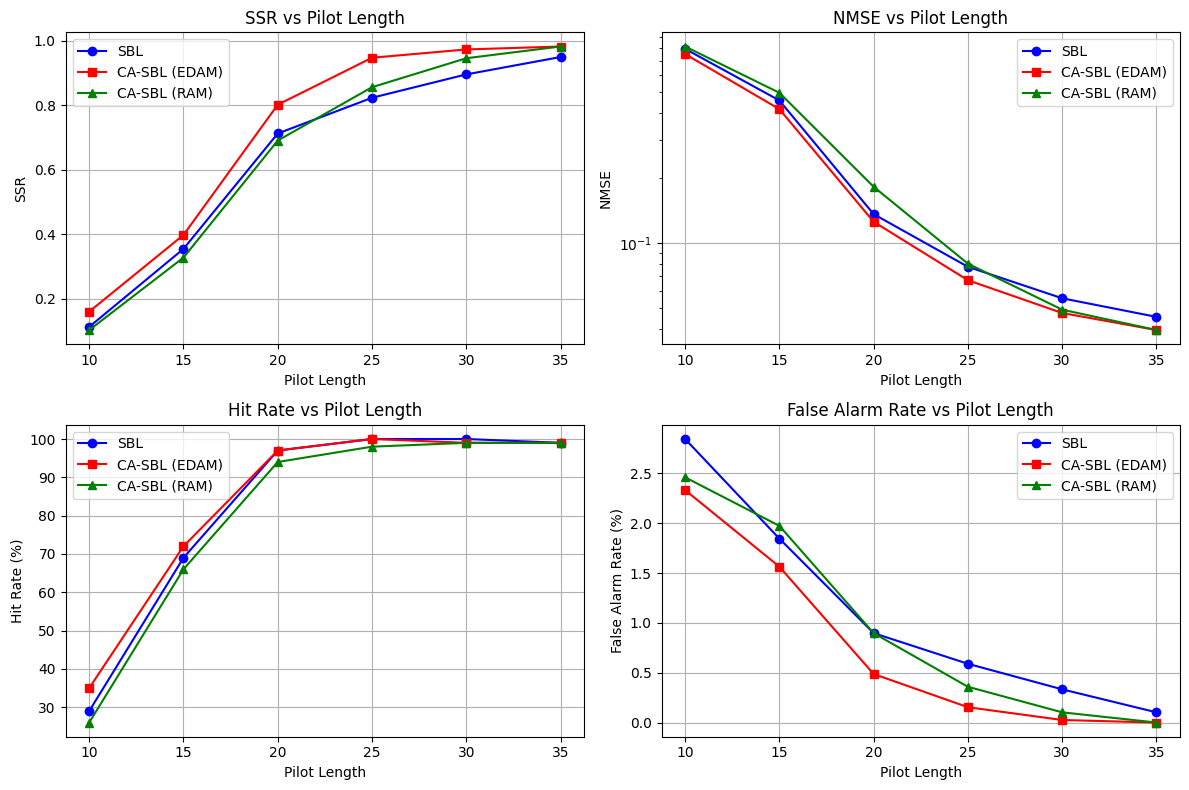

In [5]:
data = np.load('/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-sbl-pilot-length-all-snr-db-10.npz', allow_pickle=True)

gamma_sbl = data['gamma_sbl']
hit_rate_sbl = data['hit_rate_sbl']
support_recovery_rate_sbl = data['support_recovery_rate_sbl']
false_alarm_rate_sbl = data['false_alarm_rate_sbl']
norm_mse_sbl = data['norm_mse_sbl']
avg_hit_rate_sbl = data['avg_hit_rate_sbl']
avg_support_recovery_rate_sbl = data['avg_support_recovery_rate_sbl']
avg_false_alarm_rate_sbl = data['avg_false_alarm_rate_sbl']
avg_norm_mse_sbl = data['avg_norm_mse_sbl']
snr_db = data['snr_db']

data = np.load('/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-alpha-1-0-beta-2-0-ram-pilot-length-all-snr-db-10.npz', allow_pickle=True)

gamma_casbl_uncorrelated = data['gamma_casbl']
hit_rate_casbl_uncorrelated = data['hit_rate_casbl']
support_recovery_rate_casbl_uncorrelated = data['support_recovery_rate_casbl']
false_alarm_rate_casbl_uncorrelated = data['false_alarm_rate_casbl']
norm_mse_casbl_uncorrelated = data['norm_mse_casbl']
avg_hit_rate_casbl_uncorrelated = data['avg_hit_rate_casbl']
avg_support_recovery_rate_casbl_uncorrelated = data['avg_support_recovery_rate_casbl']
avg_false_alarm_rate_casbl_uncorrelated = data['avg_false_alarm_rate_casbl']
avg_norm_mse_casbl_uncorrelated = data['avg_norm_mse_casbl']

data = np.load('/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-alpha-1-0-beta-2-0-edam-pilot-length-all-snr-db-10.npz', allow_pickle=True)

gamma_casbl_correlated = data['gamma_casbl']
hit_rate_casbl_correlated = data['hit_rate_casbl']
support_recovery_rate_casbl_correlated = data['support_recovery_rate_casbl']
false_alarm_rate_casbl_correlated = data['false_alarm_rate_casbl']
norm_mse_casbl_correlated = data['norm_mse_casbl']
avg_hit_rate_casbl_correlated = data['avg_hit_rate_casbl']
avg_support_recovery_rate_casbl_correlated = data['avg_support_recovery_rate_casbl']
avg_false_alarm_rate_casbl_correlated = data['avg_false_alarm_rate_casbl']
avg_norm_mse_casbl_correlated = data['avg_norm_mse_casbl']

snr_db_index = np.where(snr_db_array == snr_db)[0][0]

# Define the SNR values for x-axis
pilot_length_values = pilot_length_array

# Create subplots for different performance metrics
plt.figure(figsize=(12, 8))

# Define a common legend format
legend_labels = ['SBL', 'CA-SBL (EDAM)', 'CA-SBL (RAM)']
legend_markers = ['o', 's', '^']
legend_colors = ['b', 'r', 'g']

# Plot Support Recovery Rate (SSR)
plt.subplot(2, 2, 1)
plt.plot(pilot_length_values, avg_support_recovery_rate_sbl, marker=legend_markers[0], linestyle='-', color=legend_colors[0])
plt.plot(pilot_length_values, avg_support_recovery_rate_casbl_correlated, marker=legend_markers[1], linestyle='-', color=legend_colors[1])
plt.plot(pilot_length_values, avg_support_recovery_rate_casbl_uncorrelated, marker=legend_markers[2], linestyle='-', color=legend_colors[2])
plt.xlabel("Pilot Length")
plt.ylabel("SSR")
plt.title("SSR vs Pilot Length")
plt.grid(True)
plt.legend(legend_labels)

# Plot NMSE (Normalized MSE)
plt.subplot(2, 2, 2)
plt.plot(pilot_length_values, avg_norm_mse_sbl, marker=legend_markers[0], linestyle='-', color=legend_colors[0])
plt.plot(pilot_length_values, avg_norm_mse_casbl_correlated, marker=legend_markers[1], linestyle='-', color=legend_colors[1])
plt.plot(pilot_length_values, avg_norm_mse_casbl_uncorrelated, marker=legend_markers[2], linestyle='-', color=legend_colors[2])
plt.xlabel("Pilot Length")
plt.ylabel("NMSE")
plt.title("NMSE vs Pilot Length")
plt.yscale('log')  # Log scale for better visualization
plt.grid(True)
plt.legend(legend_labels)

# Plot Hit Rate
plt.subplot(2, 2, 3)
plt.plot(pilot_length_values, avg_hit_rate_sbl, marker=legend_markers[0], linestyle='-', color=legend_colors[0])
plt.plot(pilot_length_values, avg_hit_rate_casbl_correlated, marker=legend_markers[1], linestyle='-', color=legend_colors[1])
plt.plot(pilot_length_values, avg_hit_rate_casbl_uncorrelated, marker=legend_markers[2], linestyle='-', color=legend_colors[2])
plt.xlabel("Pilot Length")
plt.ylabel("Hit Rate (%)")
plt.title("Hit Rate vs Pilot Length")
plt.grid(True)
plt.legend(legend_labels)

# Plot False Alarm Rate
plt.subplot(2, 2, 4)
plt.plot(pilot_length_values, avg_false_alarm_rate_sbl, marker=legend_markers[0], linestyle='-', color=legend_colors[0])
plt.plot(pilot_length_values, avg_false_alarm_rate_casbl_correlated, marker=legend_markers[1], linestyle='-', color=legend_colors[1])
plt.plot(pilot_length_values, avg_false_alarm_rate_casbl_uncorrelated, marker=legend_markers[2], linestyle='-', color=legend_colors[2])
plt.xlabel("Pilot Length")
plt.ylabel("False Alarm Rate (%)")
plt.title("False Alarm Rate vs Pilot Length")
plt.grid(True)
plt.legend(legend_labels)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
